# Set up notebook

In [70]:
import numpy as np
import pandas as pd
from sklearn import decomposition, preprocessing, model_selection, linear_model, metrics
from statsmodels.tsa import arima_model

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
plt.style.use("fivethirtyeight")

# Load data

In [38]:
df = pd.read_hdf("/Users/joce/learning/data_science/capstone_datasets/twosigma/train.h5")

In [39]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


# Data exploration

## Basic

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710756 entries, 0 to 1710755
Columns: 111 entries, id to y
dtypes: float32(109), int16(2)
memory usage: 730.9 MB


In [7]:
df.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,...,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.536046e+00,7.729436e+11,-3.320328e-01,-5.046012e-01,1.801661e+01,-2.040938e-02,-5.703754e+08,-1.622954e-01,...,-8.584833e-02,-9.103397e-02,-8.156685e-02,-7.287001e-02,4.908321e-02,5.236218e-03,-1.699966e-02,-9.735299e-01,3.881475e-04,2.217509e-04
std,6.308563e+02,5.195685e+02,2.497382e+02,7.620606e+13,6.519810e+01,1.020749e+02,9.258360e+02,2.494859e-01,7.502322e+10,3.668149e+00,...,6.125852e-01,2.471038e-01,2.346534e-01,2.235729e-01,3.102316e-01,1.133733e-01,2.116284e-01,9.605551e-01,3.011983e-02,2.240643e-02
min,0.000000e+00,0.000000e+00,-2.017497e+04,-7.375435e-02,-9.848880e+03,-3.434176e+04,-8.551914e+03,-2.344957e+00,-1.043737e+13,-1.077101e+03,...,-1.687572e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-5.250904e-01,-4.449529e-01,-1.000000e+00,-2.000000e+00,-1.265686e-01,-8.609413e-02
25%,5.500000e+02,5.040000e+02,-1.449710e-01,-2.956479e-02,-5.967524e-02,-1.655826e-01,-1.057050e-01,-1.996543e-01,-1.960470e-01,-2.280967e-01,...,-4.050297e-01,-4.651562e-04,-1.992532e-04,-2.203252e-05,-1.521701e-01,-7.377038e-02,-3.887695e-15,-2.000000e+00,-1.998819e-02,-9.561389e-03
50%,1.098000e+03,9.560000e+02,-8.368272e-04,5.523058e-03,2.109505e-02,2.475614e-03,1.175234e-02,-4.064488e-02,-7.395084e-03,-3.029069e-02,...,-8.502064e-02,-3.951567e-12,-1.418487e-13,-1.591224e-16,-1.476793e-02,9.782702e-05,0.000000e+00,-6.597540e-01,1.117279e-05,-1.570681e-04
75%,1.657000e+03,1.401000e+03,1.199108e-01,1.078554e-01,1.952209e-01,3.037236e-01,1.556464e-01,1.303819e-01,1.832071e-01,1.764751e-01,...,1.909600e-01,-5.219879e-40,0.000000e+00,0.000000e+00,1.772415e-01,7.855728e-02,0.000000e+00,-5.188884e-08,2.047074e-02,9.520990e-03
max,2.158000e+03,1.812000e+03,3.252527e+03,1.068448e+16,3.823001e+03,1.239737e+03,6.785965e+04,1.378195e+00,5.203165e+02,7.677125e+01,...,4.957758e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.569265e+00,6.844833e-01,1.000000e+00,0.000000e+00,1.435858e-01,9.349781e-02


In [12]:
len(df.columns)

111

In [13]:
len([i for i in df.columns if "derived_" in i])

5

In [14]:
len([i for i in df.columns if "fundamental_" in i])

63

In [15]:
len([i for i in df.columns if "technical_" in i])

40

## Target variable

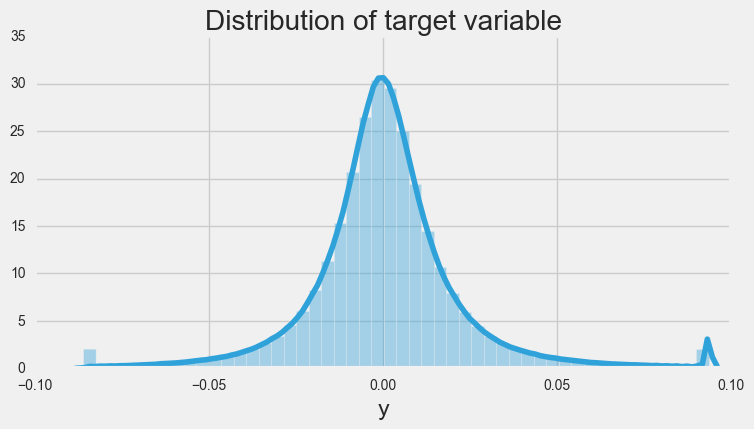

In [28]:
plt.subplots(figsize=(8,4));
sns.distplot(df["y"]);
plt.title("Distribution of target variable");
plt.show();

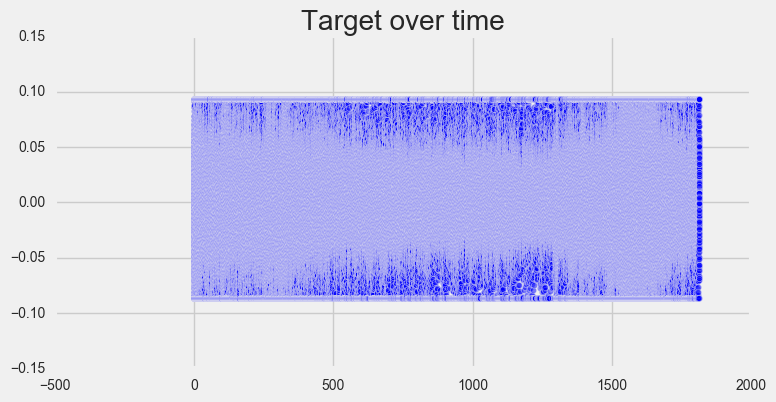

In [58]:
plt.subplots(figsize=(8,4));
plt.scatter(df["timestamp"], df["y"], marker='o', alpha=0.5);
plt.title("Target over time");
plt.show();

## "derived_"

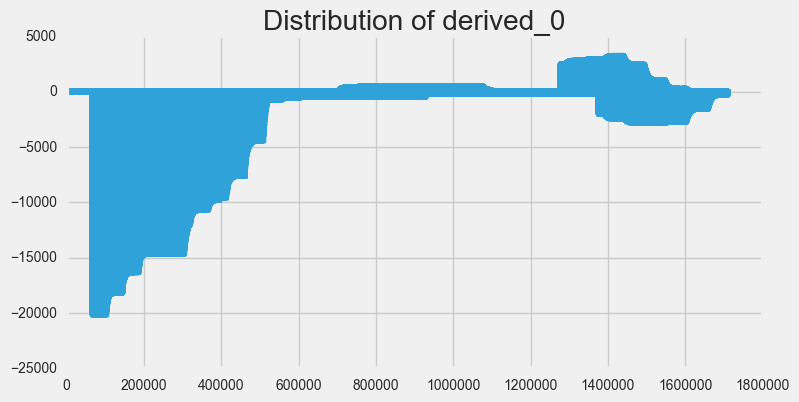

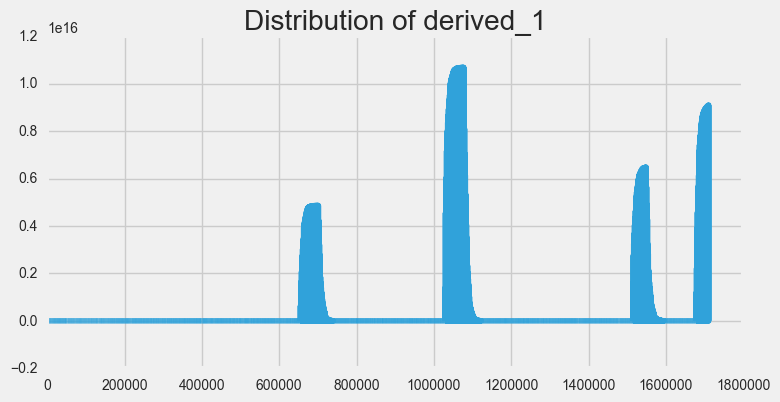

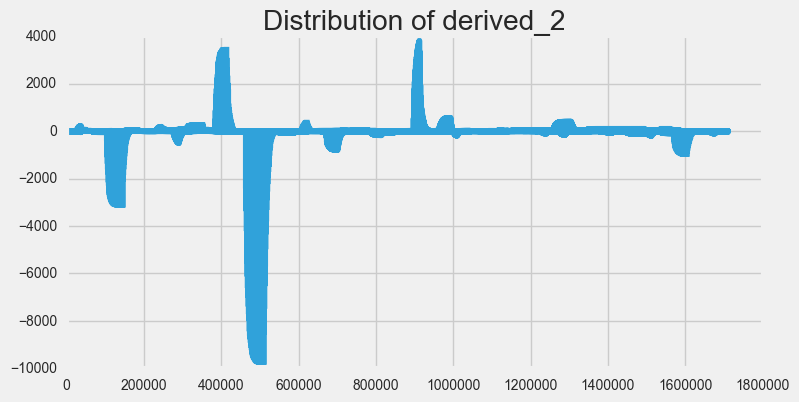

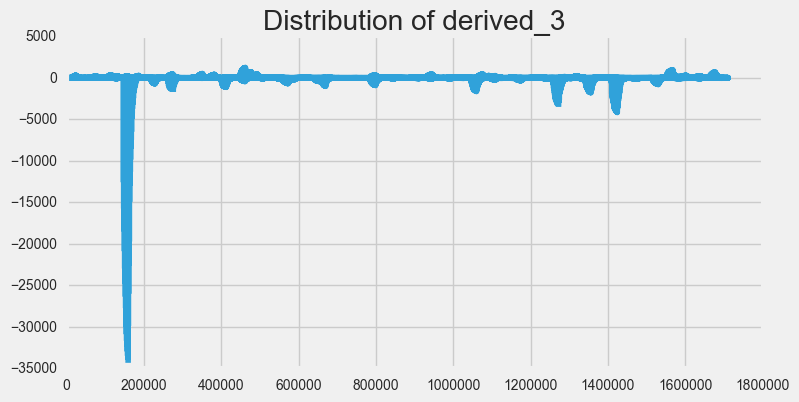

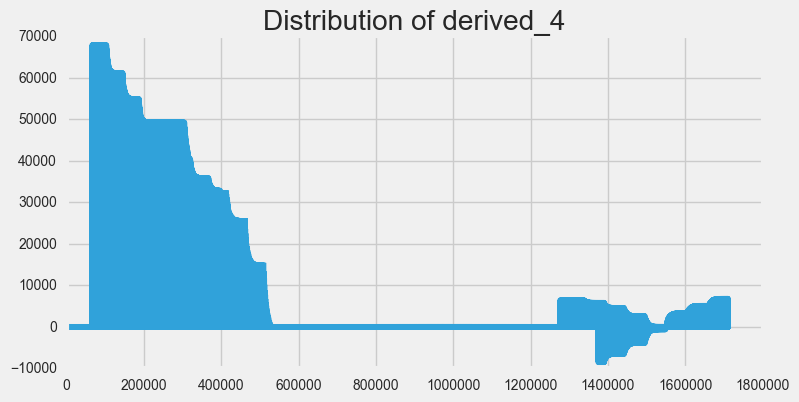

In [42]:
for i in (i for i in df.columns if "derived_" in i):
    plt.subplots(figsize=(8,4));
    plt.plot(df[i]);
    plt.title("Distribution of {}".format(i));
    plt.show();

## "fundamental_"

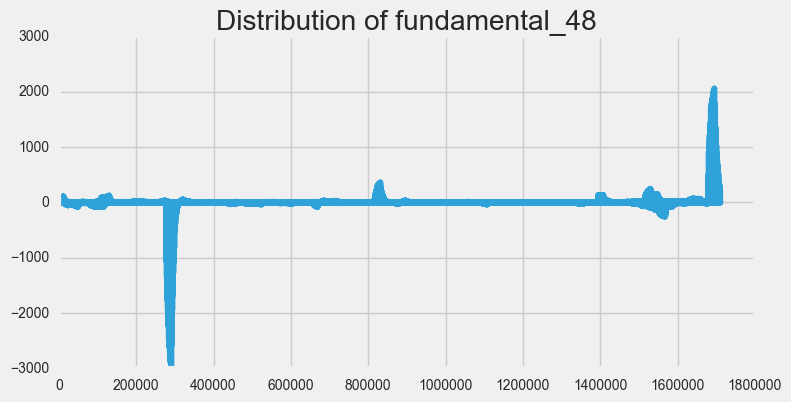

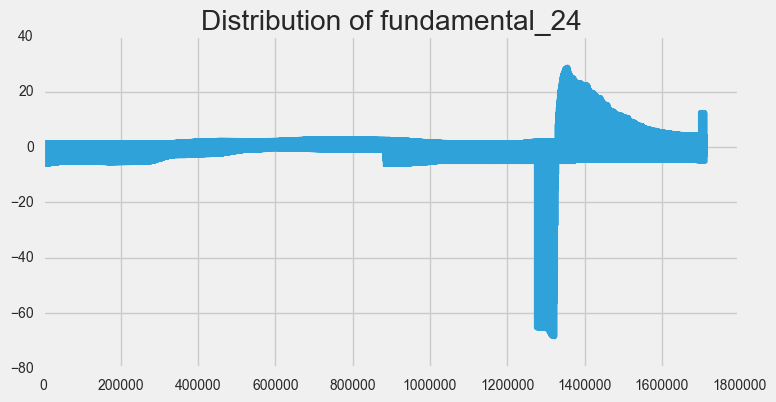

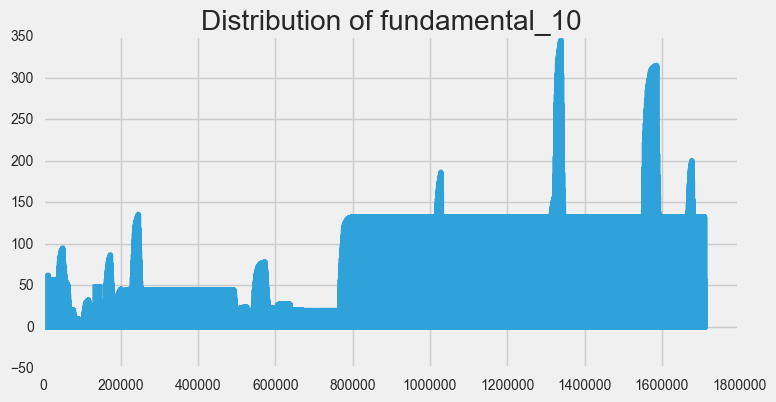

In [44]:
# we'll just look at a few of the fundamental and technical columns because there are too many to plot all of them
for i in np.random.choice([i for i in df.columns if "fundamental_" in i], size=3, replace=False):
    plt.subplots(figsize=(8,4));
    plt.plot(df[i]);
    plt.title("Distribution of {}".format(i));
    plt.show();

## "technical_"

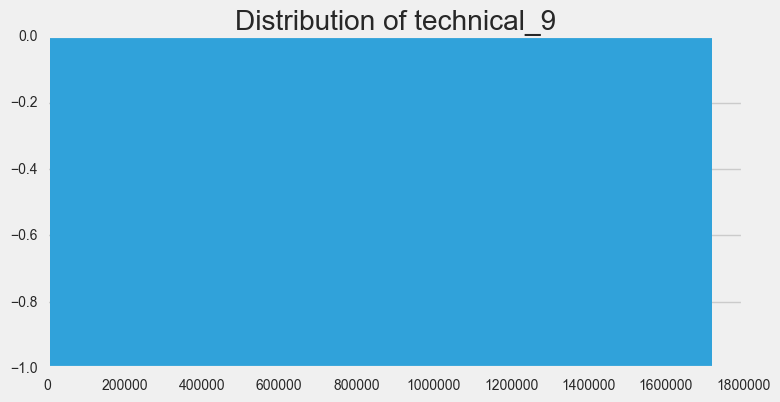

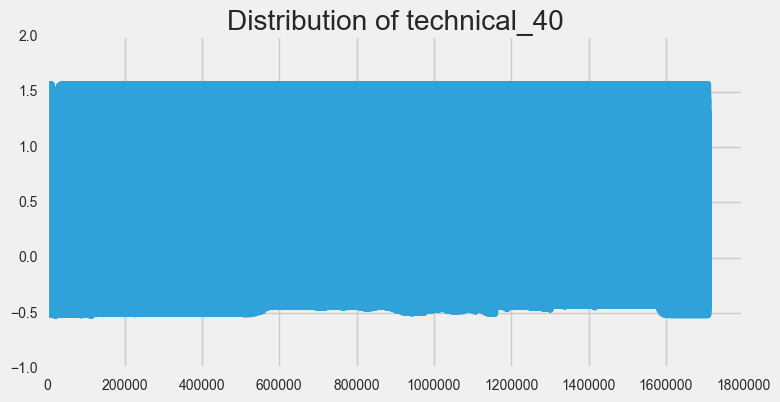

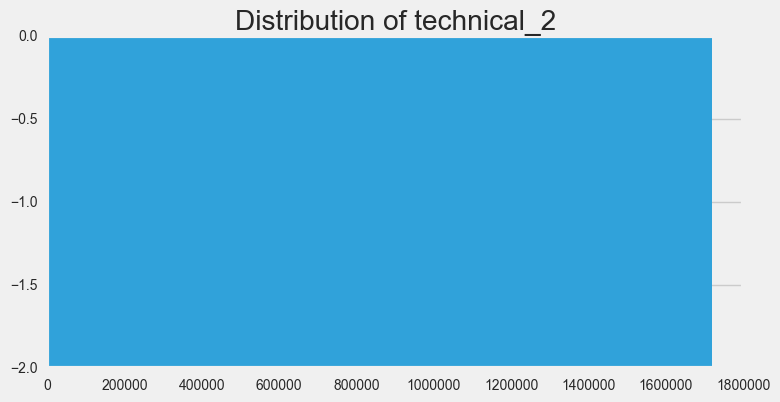

In [45]:
# we'll just look at a few of the fundamental and technical columns because there are too many to plot all of them
for i in np.random.choice([i for i in df.columns if "technical_" in i], size=3, replace=False):
    plt.subplots(figsize=(8,4));
    plt.plot(df[i]);
    plt.title("Distribution of {}".format(i));
    plt.show();

# Data mining

## NA values

In [71]:
df2 = df.copy()

In [72]:
for i in (i for i in df2.columns if "_" in i):
    df2[i].fillna(df2[i].median(), inplace=True)

# Basic modeling
- without consideration for anything

In [73]:
traindf = df2[df2["timestamp"] <= 1000]
testdf = df2[df2["timestamp"] > 1000]

In [74]:
X_train = traindf[[i for i in traindf.columns if "_" in i]]
y_train = traindf["y"]

In [75]:
X_test = testdf[[i for i in testdf.columns if "_" in i]]
y_test = testdf["y"]

In [82]:
lasso = linear_model.LassoCV(cv=5)

In [83]:
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [84]:
y_pred = lasso.predict(X_test)

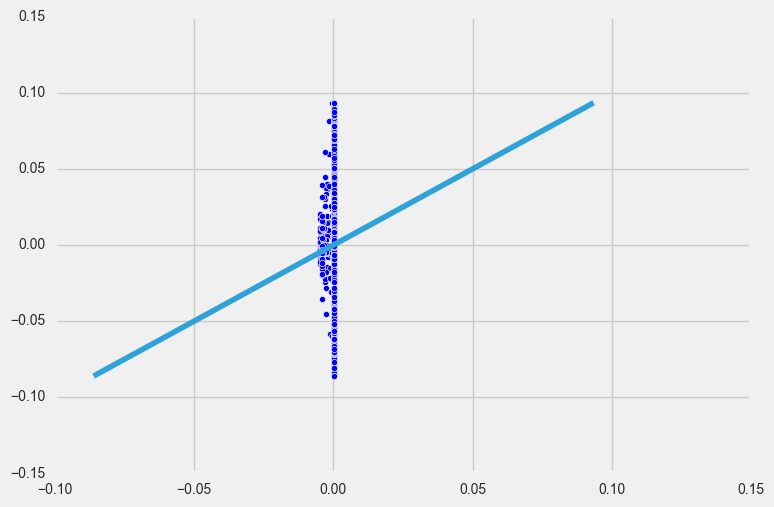

In [85]:
plt.scatter(y_pred, y_test);
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'-')
plt.show();

In [86]:
lasso.score(X_test, y_test)

-1.7424160853485308e-05